### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

# Feature Scaling Methods

## 1. Data with no outliers (fake data)

In [5]:
import numpy as np
import seaborn as sns
from math import pi
import matplotlib.pyplot as plt

In [6]:
# generating 'moment' points
t = np.linspace(0, 2 * pi, 100)

In [7]:
# plot points inside an elipse
c_x = 15
radius_x = 5

x = c_x + (radius_x * np.cos(t))

In [8]:
# plot points inside an elipse
c_y = 2.5
radius_y = 1

y = c_y + (radius_y * np.sin(t))

In [9]:
def find_fig_size(x, y, max_inches=10):
    span_w = x.max() - x.min()
    span_h = y.max() - y.min()

    ratio_wh = span_w / span_h

    # x-span is greater or equal to y-span
    if ratio_wh >= 1.0:
        fig_width = max_inches
        fig_height = max_inches / ratio_wh
    else:
        fig_width = max_inches * ratio_wh
        fig_height = max_inches

    return (fig_width, fig_height)

/Users/hisamuka/yeah/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


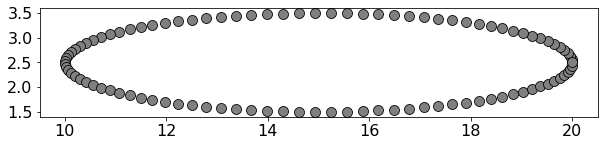

In [10]:
plt.figure(figsize=find_fig_size(x, y, 10))
sns.scatterplot(x, y, color='gray', edgecolor='black', s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
display()

In [11]:
data = np.hstack((x.reshape(x.size, 1), y.reshape(y.size, 1)))
data.shape

(100, 2)

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)

std_scaler = StandardScaler()
data_std = std_scaler.fit_transform(data)

robust_scaler = RobustScaler()
data_robust = robust_scaler.fit_transform(data)

/Users/hisamuka/yeah/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hisamuka/yeah/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hisamuka/yeah/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


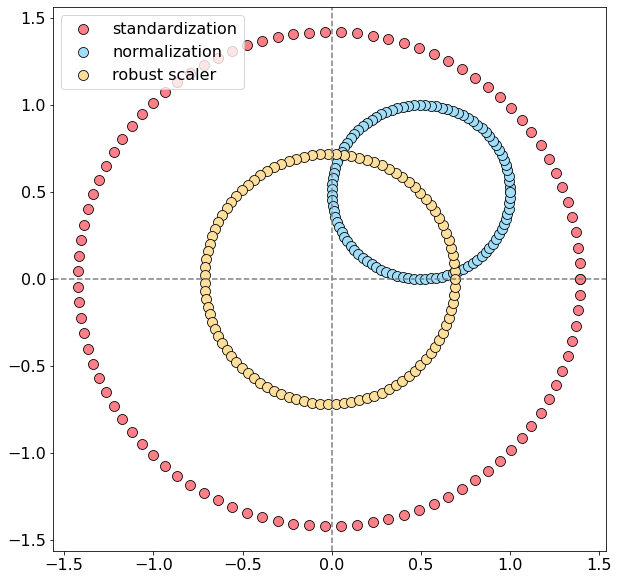

In [16]:
plt.figure(figsize=find_fig_size(data_std[:,0], data_std[:,1]))
sns.scatterplot(data_std[:,0], data_std[:,1], color='#fe7f87', edgecolor='black', s=100, label='standardization')
sns.scatterplot(data_norm[:,0], data_norm[:,1], s=100, color='#a0def9', edgecolor='black', label='normalization')
sns.scatterplot(data_robust[:,0], data_robust[:,1], color='#FFDF9C', edgecolor='black', s=100, label='robust scaler')
plt.axvline(0, 0, 1, c='gray', linestyle='dashed')
plt.axhline(0, 0, 1, c='gray', linestyle='dashed')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
display()

## 2. Data with outliers (fake data)

In [17]:
x_with_outliers = np.append(x, [0.8 * x.max(), 0.9 * x.max(), 0.85 * x.max(), 1 * x.max(), 1.05 * x.max()])

In [18]:
y_with_outliers = np.append(y, [1.2 * y.max(), 2 * y.max(), 1.5 * y.max(), 1.8 * y.max(), 1.3 * y.max()])

/Users/hisamuka/yeah/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

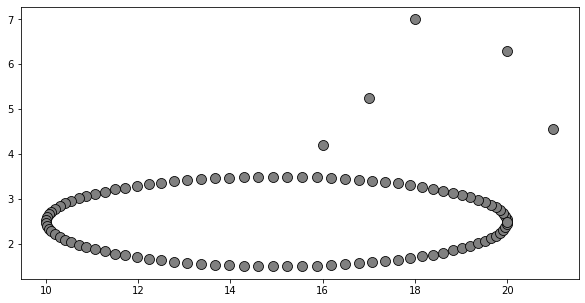

In [19]:
plt.figure(figsize=find_fig_size(x_with_outliers, y_with_outliers))
sns.scatterplot(x_with_outliers, y_with_outliers, color='gray', edgecolor='black', s=100)

In [20]:
data_with_outliers = np.hstack((x_with_outliers.reshape(x_with_outliers.size, 1), y_with_outliers.reshape(y_with_outliers.size, 1)))

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data_with_outliers)

std_scaler = StandardScaler()
data_std = std_scaler.fit_transform(data_with_outliers)

robust_scaler = RobustScaler()
data_robust = robust_scaler.fit_transform(data_with_outliers)

/Users/hisamuka/yeah/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hisamuka/yeah/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hisamuka/yeah/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


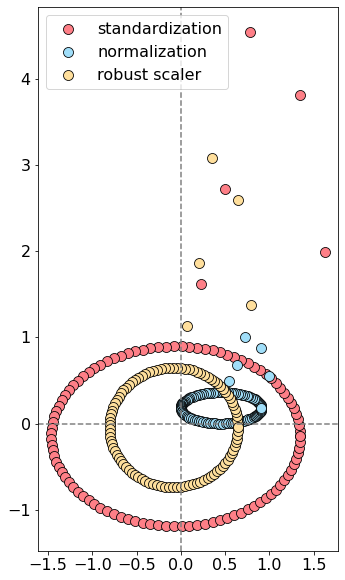

In [22]:
plt.figure(figsize=find_fig_size(data_std[:,0], data_std[:,1]))
sns.scatterplot(data_std[:,0], data_std[:,1], color='#fe7f87', edgecolor='black', s=100, label='standardization')
sns.scatterplot(data_norm[:,0], data_norm[:,1], s=100, color='#a0def9', edgecolor='black', label='normalization')
sns.scatterplot(data_robust[:,0], data_robust[:,1], color='#FFDF9C', edgecolor='black', s=100, label='robust scaler')
plt.axvline(0, 0, 1, c='gray', linestyle='dashed')
plt.axhline(0, 0, 1, c='gray', linestyle='dashed')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
display()